In [2]:
import requests
import matplotlib.pyplot as plt
from dependencies import Box, GeoTIFF

def get_lambert(address:str) -> (int,int):
    req = requests.get(f"http://loc.geopunt.be/geolocation/location?q={address}&c=1")
    return (req.json()["LocationResult"][0]["Location"]["X_Lambert72"],
            req.json()["LocationResult"][0]["Location"]["Y_Lambert72"])

x, y = get_lambert(input("Address : "))
size = int(input("Crop size: "))
plt.figure(figsize=(8,8))
tif = GeoTIFF.get_containing_tif(x, y, size)
crop = tif.crop_location(x, y, size)
#crop.show()

Address : Bosstraat 45 Duffel
Crop size: 100


<Figure size 576x576 with 0 Axes>

In [19]:
import pandas as pd
import geopandas as gpd
from geopandas import GeoDataFrame
from shapely.geometry import Polygon
from shapely.geometry import MultiPolygon

shape_lookup = pd.read_csv("./Shapes/shape_lookup.csv", sep="|")

def center(poly:Polygon):
    return(int(poly.bounds[0]+poly.bounds[2]-poly.bounds[0]),
           int(poly.bounds[1]+poly.bounds[3]-poly.bounds[1]))

def get_shapes_in_box(gdf: GeoDataFrame, box: Box) -> GeoDataFrame:
    return gdf[gdf.geometry.apply(
        lambda d: box.contains_point(
            x = center(Polygon(d))[0],
            y = center(Polygon(d))[1])
        if type(d) != MultiPolygon else False)]

def get_containing_shape_file(tif_box:Box, file_type:str):
    entry = shape_lookup[shape_lookup[file_type].apply(
        lambda x:Box.from_string(x).contains_box(tif_box) if pd.notnull(x) else False)]
    if entry.empty: return False
    return gpd.read_file(f"./Shapes/{entry.Province.values[0]}/{entry.Place.values[0]}/Bpn_{file_type}.shp")

In [17]:
shape_lookup

,Place,Province,CaBl,CaBu,ReBu
0,Aartselaar,Antwerpen,148952 199943 152798 204560 3846 4617,NaN,148977 199945 152668 204502 3691 4557
1,Antwerpen,Antwerpen,141272 203701 159026 229767 17754 26066,147923 207345 157827 214886 9904 7541,141490 203963 159013 229762 17523 25799
2,Arendonk,Antwerpen,196056 220435 203829 231746 7773 11311,199191 223404 199229 223445 38 41,196127 220782 203647 230679 7520 9897
3,Baarle-Hertog,Antwerpen,181838 231590 190598 238597 8760 7007,NaN,185124 231843 190564 238099 5440 6256
4,Balen,Antwerpen,200382 200958 212516 211611 12134 10653,200416 201263 212499 211232 12083 9969,206625 208293 206633 208299 8 6
...,...,...,...,...,...
277,Tongeren,Limburg,221970 157179 233540 168608 11570 11429,222304 158069 232851 168119 10547 10050,NaN
278,Voeren,Limburg,242765 156601 258866 164578 16101 7977,NaN,242912 156684 258459 164565 15547 7881
279,Wellen,Limburg,213099 167240 220675 173475 7576 6235,213365 167260 220323 173403 6958 6143,NaN
280,Zonhoven,Limburg,215448 184079 226967 189616 11519 5537,NaN,215610 184086 224973 189593 9363 5507


Address : Bosstraat 45 Duffel
Crop size: 100


<Figure size 576x576 with 0 Axes>

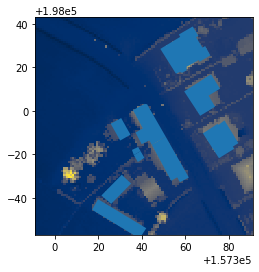

In [22]:
import requests
import matplotlib.pyplot as plt
from dependencies import Box, GeoTIFF

def get_lambert(address:str) -> (int,int):
    req = requests.get(f"http://loc.geopunt.be/geolocation/location?q={address}&c=1")
    return (req.json()["LocationResult"][0]["Location"]["X_Lambert72"],
            req.json()["LocationResult"][0]["Location"]["Y_Lambert72"])

x, y = get_lambert(input("Address : "))
size = int(input("Crop size: "))

plt.figure(figsize=(8,8))
tif = GeoTIFF.get_containing_tif(x, y, size)
crop = tif.crop_location(x, y, size)
shape_file = get_containing_shape_file(crop.box, "CaBu")
boxed_shapes = get_shapes_in_box(shape_file, crop.box)
boxed_shapes.plot()
crop.show()

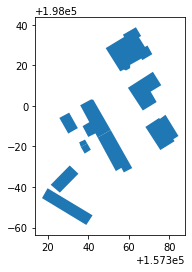

In [23]:
boxed_shapes.plot()